<a href="https://colab.research.google.com/github/olyviah82/House_Pricing/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso,LassoCV
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

# Get the Dataset

In [53]:
data=pd.read_csv('modified_data.csv')

In [54]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [55]:
data.shape

(1460, 77)

In [56]:
data.drop('Id',inplace=True,axis=1)

In [57]:
data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500


In [58]:
original_features=list(data.columns)
len(original_features)

76

In [59]:
features_missing_values=list(data.columns[data.isna().any()])
len(features_missing_values)

15

In [60]:
len(data)

1460

# Fill in Missing Features

In [61]:
bfill,mean_fill=[],[]

In [62]:
for feature in features_missing_values:
  print(feature,' ',data[feature].isna().sum()/len(data)*100,' ',data[feature].dtype)
  if data[feature].dtype=='float64':
    mean_fill.append(feature)
  else:
    bfill.append(feature)

LotFrontage   17.73972602739726   float64
MasVnrType   0.547945205479452   object
MasVnrArea   0.547945205479452   float64
BsmtQual   2.5342465753424657   object
BsmtCond   2.5342465753424657   object
BsmtExposure   2.6027397260273974   object
BsmtFinType1   2.5342465753424657   object
BsmtFinType2   2.6027397260273974   object
Electrical   0.0684931506849315   object
FireplaceQu   47.26027397260274   object
GarageType   5.5479452054794525   object
GarageYrBlt   5.5479452054794525   float64
GarageFinish   5.5479452054794525   object
GarageQual   5.5479452054794525   object
GarageCond   5.5479452054794525   object


In [63]:
mean_fill

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [64]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [65]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)

In [66]:
data.columns[data.isna().any()]

Index(['FireplaceQu'], dtype='object')

In [67]:
data['FireplaceQu'].isna().sum()

2

In [68]:
data['FireplaceQu'].fillna(method='ffill',inplace=True)

# Encode the Dataset

In [69]:
categorical_features=list(data.select_dtypes(include=['object']).columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [70]:
numerical=list(set(original_features)-set(categorical_features))
numerical

['Fireplaces',
 'BsmtFinSF2',
 'LotArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'ScreenPorch',
 'FullBath',
 'GarageCars',
 'MoSold',
 'WoodDeckSF',
 'PoolArea',
 '2ndFlrSF',
 'YrSold',
 'BsmtHalfBath',
 'GarageYrBlt',
 'MasVnrArea',
 'GrLivArea',
 'OpenPorchSF',
 'YearBuilt',
 'LotFrontage',
 'TotRmsAbvGrd',
 'SalePrice',
 '3SsnPorch',
 'MiscVal',
 'OverallQual',
 'EnclosedPorch',
 'BsmtUnfSF',
 'HalfBath',
 'YearRemodAdd',
 'GarageArea',
 'LowQualFinSF',
 'MSSubClass',
 'OverallCond',
 'KitchenAbvGr',
 'BsmtFinSF1',
 'BsmtFullBath',
 'BedroomAbvGr']

In [71]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [72]:
nominal=['MSZoning','LandContour','Neighborhood']
ordinal=list(set(categorical_features)-set(nominal))

In [73]:
target=['SalePrice']

In [74]:
df_nominal=pd.get_dummies(data[nominal])

In [75]:
for feature in ordinal:
  data[feature]=data[feature].astype('category').cat.codes

df_ordinal=data[ordinal]

In [76]:
data[numerical]

,Fireplaces,BsmtFinSF2,LotArea,TotalBsmtSF,1stFlrSF,ScreenPorch,FullBath,GarageCars,MoSold,WoodDeckSF,...,HalfBath,YearRemodAdd,GarageArea,LowQualFinSF,MSSubClass,OverallCond,KitchenAbvGr,BsmtFinSF1,BsmtFullBath,BedroomAbvGr
0,0,0,8450,856,856,0,2,2,2,0,...,1,2003,548,0,60,5,1,706,1,3
1,1,0,9600,1262,1262,0,2,2,5,298,...,0,1976,460,0,20,8,1,978,0,3
2,1,0,11250,920,920,0,2,2,9,0,...,1,2002,608,0,60,5,1,486,1,3
3,1,0,9550,756,961,0,1,3,2,0,...,0,1970,642,0,70,5,1,216,1,3
4,1,0,14260,1145,1145,0,2,3,12,192,...,1,2000,836,0,60,5,1,655,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,7917,953,953,0,2,2,8,0,...,1,2000,460,0,60,5,1,0,0,3
1456,2,163,13175,1542,2073,0,2,2,2,349,...,0,1988,500,0,20,6,1,790,1,3
1457,2,0,9042,1152,1188,0,2,1,5,0,...,0,2006,252,0,70,9,1,275,0,4
1458,0,1029,9717,1078,1078,0,1,1,4,366,...,0,1996,240,0,20,6,1,49,1,2


In [77]:
new_data=pd.concat([df_nominal,df_ordinal,data[numerical]],axis=1)

In [78]:
new_data.shape

(1460, 107)

# Standardize

In [79]:
new_data.drop('SalePrice',axis=1,inplace=True)

In [80]:
X=new_data.to_numpy()

In [81]:
X[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       1.000e+00, 1.200e+01, 3.000e+00, 6.000e+00, 1.000e+00, 1.300e+01,
       2.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
       4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 5.000e+00,
       4.000e+00, 8.000e+00, 4.000e+00, 5.000e+00, 2.000e+00, 2.000e+00,
       4.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 3.000e+00,
       2.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
       8.450e+03, 8.560e+02, 8.560e+02, 0.000e+00, 2.000e+00, 2.000e+00,
       2.000e+00, 0.000e+00, 0.000e+00, 8.540e+02, 

In [82]:
X=StandardScaler().fit_transform(X)

In [83]:
X[0]

array([-0.08304548, -0.21585871, -0.10526316,  0.51813339, -0.41895507,
       -0.21235968, -0.18831089, -0.15899968,  0.33712564, -0.10854037,
       -0.03703704, -0.10526316, -0.20339487, -0.1398323 ,  2.95522137,
       -0.19025216, -0.27116307, -0.23917551, -0.16124951, -0.10854037,
       -0.1863522 , -0.42683279, -0.07875671, -0.22941573, -0.16998114,
       -0.23595776, -0.28963792, -0.13199092, -0.23106504, -0.20521398,
       -0.25018188, -0.13199092, -0.16347148, -0.08712888, -0.41169079,
        0.26381257, -0.23012211,  0.74309239,  0.64046232,  0.25597761,
       -0.49151573,  0.75162623, -0.40936914,  0.2085023 , -0.12304604,
        0.06423821, -0.03174026, -0.02618016,  0.303692  , -0.22571613,
       -0.77797579, -1.23804229, -0.40779461,  1.02668924,  0.18797343,
        0.31386709,  1.11993319,  0.30941909,  0.28974476,  0.83559903,
        0.36420746, -0.71775144, -0.88465767,  0.60466978, -0.03628912,
        0.28780036, -0.29055229,  0.22403433, -0.12579688,  0.75

In [84]:
y=data[target]

In [85]:
y=y.to_numpy()

In [86]:
y.shape

(1460, 1)

In [87]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [88]:
y=StandardScaler().fit_transform(y)

In [89]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [90]:
X.shape

(1460, 106)

*italicized text*# Feature Extraction Using PCA

In [91]:
pca=PCA(n_components=2)

In [92]:
p_components=pca.fit_transform(X)

In [93]:
p_components

array([[ 2.44330853, -1.27779629],
       [ 0.31645954,  2.63833879],
       [ 2.85721958, -0.81049094],
       ...,
       [ 1.26182664, -0.85996118],
       [-2.85096644,  3.29434017],
       [-0.77738651,  2.7900975 ]])

In [94]:
pca.explained_variance_ratio_

array([0.10560233, 0.04472092])

# New Dataset Ready for Training


In [101]:
pca_data = pd.DataFrame(p_components,columns=['PC1','PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,SalePrice
0,2.443309,-1.277796,0.347273
1,0.316460,2.638339,0.007288
2,2.857220,-0.810491,0.536154
3,-1.333155,0.425566,-0.515281
4,5.220984,-0.249452,0.869843
...,...,...,...
1455,1.335075,-2.288561,-0.074560
1456,1.112794,3.257739,0.366161
1457,1.261827,-0.859961,1.077611
1458,-2.850966,3.294340,-0.488523


# Train the Model

In [95]:
reg=LassoCV()

In [96]:
reg.fit(p_components,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [97]:
reg.coef_

array([0.25387739, 0.01886904])

In [102]:
final_data_array=final_data.to_numpy()

In [103]:
w_1 = reg.coef_[0]
w_2 = reg.coef_[1]
b = reg.intercept_

In [105]:
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
x_1,x_2 = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [106]:
y = w_1*x_1 + w_2*x_2 

Text(0.5, 0.92, 'Plane of Best Fit')

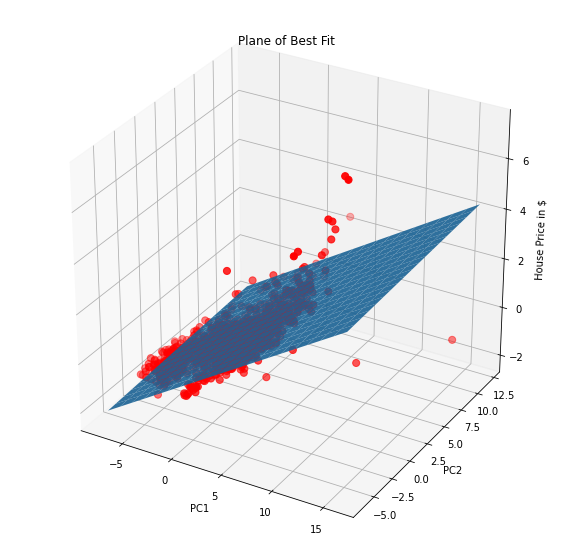

In [113]:
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(x_1,x_2,y, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title("Plane of Best Fit")

In [ ]:
y=wx+b